In [1]:
%matplotlib inline

import dateutil.parser
import datetime
import matplotlib.dates as mdates

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow. contrib import learn

from pymongo import MongoClient
from bson.objectid import ObjectId

from sklearn.metrics import mean_squared_error

from lstm import lstm_model
from data_processing import generate_data, load_csvdata

In [2]:
LOG_DIR = './ops_logs/lstm_stock'
TIMESTEPS = 10
RNN_LAYERS = [{'num_units': 5}]
DENSE_LAYERS = [10, 10]
TRAINING_STEPS = 100000
BATCH_SIZE = 100
PRINT_STEPS = TRAINING_STEPS / 100

In [3]:
def load_stock_frame(filename):
    # load the stock data
    data_raw = pd.read_csv(filename, dtype={'TIME': str})
    #data_raw['FAI'] = data_raw['FAI'].astype(float)
    data_raw['STOCK'] = data_raw['STOCK'].astype(float)
    #data_raw['PE'] = data_raw['PE'].astype(float)
    times = []
    for index, row in data_raw.iterrows():
        _t = datetime.datetime.strptime(row['TIME'],"%y%m%d")
        times.append(_t)
    
    data_raw['_time'] = pd.Series(times, index=data_raw.index)
    df = pd.DataFrame(data_raw, columns=['TIME', 'STOCK'])
    return df.set_index('TIME')

In [4]:
# scale values to resonable values and convert to float
data_stock = load_stock_frame("mydata/analyisicsv1.csv")
X, y = load_csvdata(data_stock, TIMESTEPS, seperate=False)

In [5]:
regressor = learn.SKCompat(learn.Estimator(
    model_fn=lstm_model(
        TIMESTEPS,
        RNN_LAYERS,
        DENSE_LAYERS
    ),
    model_dir=LOG_DIR
))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': None, '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_tf_random_seed': None, '_task_type': None, '_environment': 'local', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7ff375177c90>, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_num_worker_replicas': 0, '_task_id': 0, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_evaluation_master': '', '_keep_checkpoint_every_n_hours': 10000, '_master': ''}


In [6]:
# create a lstm instance and validation monitor
validation_monitor = learn.monitors.ValidationMonitor(X['val'], y['val'],
                                                     every_n_steps=PRINT_STEPS,
                                                     early_stopping_rounds=1000)
regressor.fit(X['train'], y['train'],
             monitors=[validation_monitor],
             batch_size=BATCH_SIZE,
             steps=TRAINING_STEPS)

predicted = regressor.predict(X['test'])

Instructions for updating:
Monitors are deprecated. Please use tf.train.SessionRunHook.
Instructions for updating:
Use `tf.contrib.losses.mean_squared_error` and explicit logits computation.
Instructions for updating:
Use tf.losses.mean_squared_error instead.
Instructions for updating:
Use tf.losses.compute_weighted_loss instead.
Instructions for updating:
Use tf.losses.add_loss instead.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from ./ops_logs/lstm_stock/model.ckpt-100000
INFO:tensorflow:Saving checkpoints for 100001 into ./ops_logs/lstm_stock/model.ckpt.
INFO:tensorflow:loss = 707696.0, step = 100001
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupl

/usr/local/lib/python2.7/dist-packages/tensorflow/python/util/deprecation.py:248: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


INFO:tensorflow:Starting evaluation at 2017-08-31-02:31:26
INFO:tensorflow:Restoring parameters from ./ops_logs/lstm_stock/model.ckpt-100001
INFO:tensorflow:Finished evaluation at 2017-08-31-02:31:26
INFO:tensorflow:Saving dict for global step 100001: global_step = 100001, loss = 3401.31
INFO:tensorflow:Validation (step 100001): loss = 3401.31, global_step = 100001
INFO:tensorflow:global_step/sec: 54.7725
INFO:tensorflow:loss = 690078.0, step = 100101 (1.826 sec)
INFO:tensorflow:global_step/sec: 290.958
INFO:tensorflow:loss = 702188.0, step = 100201 (0.344 sec)
INFO:tensorflow:global_step/sec: 285.454
INFO:tensorflow:loss = 709747.0, step = 100301 (0.350 sec)
INFO:tensorflow:global_step/sec: 346.11
INFO:tensorflow:loss = 682422.0, step = 100401 (0.288 sec)
INFO:tensorflow:global_step/sec: 413.006
INFO:tensorflow:loss = 709881.0, step = 100501 (0.242 sec)
INFO:tensorflow:global_step/sec: 422.797
INFO:tensorflow:loss = 689746.0, step = 100601 (0.237 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 425.366
INFO:tensorflow:loss = 695807.0, step = 107901 (0.235 sec)
INFO:tensorflow:global_step/sec: 372.725
INFO:tensorflow:loss = 704257.0, step = 108001 (0.268 sec)
INFO:tensorflow:global_step/sec: 408.022
INFO:tensorflow:loss = 700697.0, step = 108101 (0.245 sec)
INFO:tensorflow:global_step/sec: 430.432
INFO:tensorflow:loss = 672524.0, step = 108201 (0.232 sec)
INFO:tensorflow:global_step/sec: 427.212
INFO:tensorflow:loss = 662722.0, step = 108301 (0.234 sec)
INFO:tensorflow:global_step/sec: 411.883
INFO:tensorflow:loss = 699465.0, step = 108401 (0.243 sec)
INFO:tensorflow:global_step/sec: 425.311
INFO:tensorflow:loss = 698066.0, step = 108501 (0.235 sec)
INFO:tensorflow:global_step/sec: 432.047
INFO:tensorflow:loss = 698213.0, step = 108601 (0.231 sec)
INFO:tensorflow:global_step/sec: 415.861
INFO:tensorflow:loss = 683982.0, step = 108701 (0.241 sec)
INFO:tensorflow:global_step/sec: 426.467
INFO:tensorflow:loss = 704352.0, step = 108801 (0.235 sec)


INFO:tensorflow:global_step/sec: 407.248
INFO:tensorflow:loss = 700028.0, step = 116101 (0.246 sec)
INFO:tensorflow:global_step/sec: 415.179
INFO:tensorflow:loss = 691366.0, step = 116201 (0.241 sec)
INFO:tensorflow:global_step/sec: 419.909
INFO:tensorflow:loss = 679489.0, step = 116301 (0.238 sec)
INFO:tensorflow:global_step/sec: 415.079
INFO:tensorflow:loss = 682826.0, step = 116401 (0.241 sec)
INFO:tensorflow:global_step/sec: 415.93
INFO:tensorflow:loss = 688708.0, step = 116501 (0.240 sec)
INFO:tensorflow:global_step/sec: 417.893
INFO:tensorflow:loss = 687230.0, step = 116601 (0.239 sec)
INFO:tensorflow:global_step/sec: 425.356
INFO:tensorflow:loss = 687254.0, step = 116701 (0.235 sec)
INFO:tensorflow:global_step/sec: 399.398
INFO:tensorflow:loss = 698953.0, step = 116801 (0.250 sec)
INFO:tensorflow:global_step/sec: 411.274
INFO:tensorflow:loss = 675954.0, step = 116901 (0.243 sec)
INFO:tensorflow:global_step/sec: 422.105
INFO:tensorflow:loss = 679709.0, step = 117001 (0.237 sec)
I

INFO:tensorflow:loss = 654560.0, step = 124301 (0.235 sec)
INFO:tensorflow:global_step/sec: 424.782
INFO:tensorflow:loss = 683705.0, step = 124401 (0.235 sec)
INFO:tensorflow:global_step/sec: 422.477
INFO:tensorflow:loss = 708970.0, step = 124501 (0.237 sec)
INFO:tensorflow:global_step/sec: 422.189
INFO:tensorflow:loss = 696790.0, step = 124601 (0.237 sec)
INFO:tensorflow:global_step/sec: 428.8
INFO:tensorflow:loss = 678471.0, step = 124701 (0.233 sec)
INFO:tensorflow:global_step/sec: 419.264
INFO:tensorflow:loss = 697836.0, step = 124801 (0.238 sec)
INFO:tensorflow:global_step/sec: 426.88
INFO:tensorflow:loss = 705398.0, step = 124901 (0.234 sec)
INFO:tensorflow:global_step/sec: 414.795
INFO:tensorflow:loss = 703472.0, step = 125001 (0.241 sec)
INFO:tensorflow:global_step/sec: 416.176
INFO:tensorflow:loss = 694022.0, step = 125101 (0.240 sec)
INFO:tensorflow:global_step/sec: 427.568
INFO:tensorflow:loss = 671306.0, step = 125201 (0.234 sec)
INFO:tensorflow:global_step/sec: 428.787
INF

INFO:tensorflow:global_step/sec: 403.497
INFO:tensorflow:loss = 682930.0, step = 132601 (0.248 sec)
INFO:tensorflow:global_step/sec: 420.711
INFO:tensorflow:loss = 696562.0, step = 132701 (0.238 sec)
INFO:tensorflow:global_step/sec: 428.48
INFO:tensorflow:loss = 686283.0, step = 132801 (0.233 sec)
INFO:tensorflow:global_step/sec: 429.74
INFO:tensorflow:loss = 699974.0, step = 132901 (0.233 sec)
INFO:tensorflow:global_step/sec: 418.461
INFO:tensorflow:loss = 691719.0, step = 133001 (0.239 sec)
INFO:tensorflow:global_step/sec: 415.251
INFO:tensorflow:loss = 705273.0, step = 133101 (0.241 sec)
INFO:tensorflow:global_step/sec: 429.52
INFO:tensorflow:loss = 685597.0, step = 133201 (0.233 sec)
INFO:tensorflow:global_step/sec: 432.431
INFO:tensorflow:loss = 677437.0, step = 133301 (0.231 sec)
INFO:tensorflow:global_step/sec: 431.126
INFO:tensorflow:loss = 702238.0, step = 133401 (0.232 sec)
INFO:tensorflow:global_step/sec: 415.043
INFO:tensorflow:loss = 673495.0, step = 133501 (0.241 sec)
INF

INFO:tensorflow:loss = 672702.0, step = 140801 (0.247 sec)
INFO:tensorflow:global_step/sec: 422.308
INFO:tensorflow:loss = 700105.0, step = 140901 (0.237 sec)
INFO:tensorflow:global_step/sec: 430.287
INFO:tensorflow:loss = 659801.0, step = 141001 (0.232 sec)
INFO:tensorflow:global_step/sec: 411.692
INFO:tensorflow:loss = 650122.0, step = 141101 (0.243 sec)
INFO:tensorflow:global_step/sec: 420.193
INFO:tensorflow:loss = 692295.0, step = 141201 (0.238 sec)
INFO:tensorflow:global_step/sec: 423.619
INFO:tensorflow:loss = 700272.0, step = 141301 (0.236 sec)
INFO:tensorflow:global_step/sec: 416.585
INFO:tensorflow:loss = 697417.0, step = 141401 (0.240 sec)
INFO:tensorflow:global_step/sec: 418.008
INFO:tensorflow:loss = 684522.0, step = 141501 (0.239 sec)
INFO:tensorflow:global_step/sec: 423.745
INFO:tensorflow:loss = 657580.0, step = 141601 (0.236 sec)
INFO:tensorflow:global_step/sec: 426.694
INFO:tensorflow:loss = 694334.0, step = 141701 (0.234 sec)
INFO:tensorflow:global_step/sec: 428.043


INFO:tensorflow:global_step/sec: 400.643
INFO:tensorflow:loss = 700576.0, step = 149101 (0.250 sec)
INFO:tensorflow:global_step/sec: 419.406
INFO:tensorflow:loss = 706263.0, step = 149201 (0.238 sec)
INFO:tensorflow:global_step/sec: 419.579
INFO:tensorflow:loss = 700449.0, step = 149301 (0.238 sec)
INFO:tensorflow:global_step/sec: 418.655
INFO:tensorflow:loss = 700806.0, step = 149401 (0.239 sec)
INFO:tensorflow:global_step/sec: 418.701
INFO:tensorflow:loss = 674527.0, step = 149501 (0.239 sec)
INFO:tensorflow:global_step/sec: 419.609
INFO:tensorflow:loss = 682454.0, step = 149601 (0.238 sec)
INFO:tensorflow:global_step/sec: 427.738
INFO:tensorflow:loss = 692161.0, step = 149701 (0.234 sec)
INFO:tensorflow:global_step/sec: 427.707
INFO:tensorflow:loss = 674529.0, step = 149801 (0.234 sec)
INFO:tensorflow:global_step/sec: 419.447
INFO:tensorflow:loss = 662213.0, step = 149901 (0.238 sec)
INFO:tensorflow:global_step/sec: 405.612
INFO:tensorflow:loss = 648956.0, step = 150001 (0.247 sec)


INFO:tensorflow:loss = 694589.0, step = 157301 (0.241 sec)
INFO:tensorflow:global_step/sec: 408.492
INFO:tensorflow:loss = 703887.0, step = 157401 (0.245 sec)
INFO:tensorflow:global_step/sec: 429.472
INFO:tensorflow:loss = 695829.0, step = 157501 (0.233 sec)
INFO:tensorflow:global_step/sec: 429.332
INFO:tensorflow:loss = 681253.0, step = 157601 (0.233 sec)
INFO:tensorflow:global_step/sec: 414.896
INFO:tensorflow:loss = 699518.0, step = 157701 (0.241 sec)
INFO:tensorflow:global_step/sec: 390.634
INFO:tensorflow:loss = 699025.0, step = 157801 (0.256 sec)
INFO:tensorflow:global_step/sec: 416.668
INFO:tensorflow:loss = 698100.0, step = 157901 (0.240 sec)
INFO:tensorflow:global_step/sec: 417.481
INFO:tensorflow:loss = 705542.0, step = 158001 (0.240 sec)
INFO:tensorflow:global_step/sec: 426.323
INFO:tensorflow:loss = 701758.0, step = 158101 (0.234 sec)
INFO:tensorflow:global_step/sec: 431.033
INFO:tensorflow:loss = 680742.0, step = 158201 (0.232 sec)
INFO:tensorflow:global_step/sec: 418.745


INFO:tensorflow:loss = 689936.0, step = 165501 (0.240 sec)
INFO:tensorflow:global_step/sec: 418.289
INFO:tensorflow:loss = 702846.0, step = 165601 (0.239 sec)
INFO:tensorflow:global_step/sec: 426.096
INFO:tensorflow:loss = 693765.0, step = 165701 (0.235 sec)
INFO:tensorflow:global_step/sec: 418.701
INFO:tensorflow:loss = 688753.0, step = 165801 (0.239 sec)
INFO:tensorflow:global_step/sec: 427.654
INFO:tensorflow:loss = 693878.0, step = 165901 (0.234 sec)
INFO:tensorflow:global_step/sec: 419.521
INFO:tensorflow:loss = 691105.0, step = 166001 (0.238 sec)
INFO:tensorflow:global_step/sec: 421.191
INFO:tensorflow:loss = 680016.0, step = 166101 (0.238 sec)
INFO:tensorflow:global_step/sec: 430.426
INFO:tensorflow:loss = 710845.0, step = 166201 (0.232 sec)
INFO:tensorflow:global_step/sec: 427.884
INFO:tensorflow:loss = 684013.0, step = 166301 (0.234 sec)
INFO:tensorflow:global_step/sec: 418.729
INFO:tensorflow:loss = 699224.0, step = 166401 (0.239 sec)
INFO:tensorflow:global_step/sec: 430.919


INFO:tensorflow:loss = 702229.0, step = 173701 (0.234 sec)
INFO:tensorflow:global_step/sec: 415.346
INFO:tensorflow:loss = 714127.0, step = 173801 (0.241 sec)
INFO:tensorflow:global_step/sec: 430.767
INFO:tensorflow:loss = 707671.0, step = 173901 (0.232 sec)
INFO:tensorflow:global_step/sec: 424.933
INFO:tensorflow:loss = 693970.0, step = 174001 (0.235 sec)
INFO:tensorflow:global_step/sec: 417.672
INFO:tensorflow:loss = 667717.0, step = 174101 (0.239 sec)
INFO:tensorflow:global_step/sec: 428.462
INFO:tensorflow:loss = 693184.0, step = 174201 (0.233 sec)
INFO:tensorflow:global_step/sec: 418.775
INFO:tensorflow:loss = 693188.0, step = 174301 (0.239 sec)
INFO:tensorflow:global_step/sec: 427.628
INFO:tensorflow:loss = 675346.0, step = 174401 (0.234 sec)
INFO:tensorflow:global_step/sec: 424.441
INFO:tensorflow:loss = 695788.0, step = 174501 (0.235 sec)
INFO:tensorflow:global_step/sec: 420.539
INFO:tensorflow:loss = 682734.0, step = 174601 (0.238 sec)
INFO:tensorflow:global_step/sec: 416.661


INFO:tensorflow:loss = 654031.0, step = 181901 (0.237 sec)
INFO:tensorflow:global_step/sec: 424.829
INFO:tensorflow:loss = 685268.0, step = 182001 (0.235 sec)
INFO:tensorflow:global_step/sec: 428.253
INFO:tensorflow:loss = 695912.0, step = 182101 (0.233 sec)
INFO:tensorflow:global_step/sec: 429.621
INFO:tensorflow:loss = 701387.0, step = 182201 (0.233 sec)
INFO:tensorflow:global_step/sec: 427.749
INFO:tensorflow:loss = 709512.0, step = 182301 (0.234 sec)
INFO:tensorflow:global_step/sec: 417.563
INFO:tensorflow:loss = 658410.0, step = 182401 (0.239 sec)
INFO:tensorflow:global_step/sec: 419.493
INFO:tensorflow:loss = 677189.0, step = 182501 (0.238 sec)
INFO:tensorflow:global_step/sec: 428.772
INFO:tensorflow:loss = 696707.0, step = 182601 (0.233 sec)
INFO:tensorflow:global_step/sec: 427.661
INFO:tensorflow:loss = 693737.0, step = 182701 (0.234 sec)
INFO:tensorflow:global_step/sec: 417.893
INFO:tensorflow:loss = 706921.0, step = 182801 (0.239 sec)
INFO:tensorflow:global_step/sec: 426.621


INFO:tensorflow:loss = 701969.0, step = 190101 (0.247 sec)
INFO:tensorflow:global_step/sec: 408.058
INFO:tensorflow:loss = 677203.0, step = 190201 (0.245 sec)
INFO:tensorflow:global_step/sec: 428.855
INFO:tensorflow:loss = 710422.0, step = 190301 (0.233 sec)
INFO:tensorflow:global_step/sec: 423.802
INFO:tensorflow:loss = 709938.0, step = 190401 (0.236 sec)
INFO:tensorflow:global_step/sec: 419.694
INFO:tensorflow:loss = 695033.0, step = 190501 (0.238 sec)
INFO:tensorflow:global_step/sec: 426.907
INFO:tensorflow:loss = 677086.0, step = 190601 (0.234 sec)
INFO:tensorflow:global_step/sec: 417.758
INFO:tensorflow:loss = 705812.0, step = 190701 (0.239 sec)
INFO:tensorflow:global_step/sec: 428.725
INFO:tensorflow:loss = 684112.0, step = 190801 (0.233 sec)
INFO:tensorflow:global_step/sec: 419.215
INFO:tensorflow:loss = 712879.0, step = 190901 (0.239 sec)
INFO:tensorflow:global_step/sec: 426.907
INFO:tensorflow:loss = 699621.0, step = 191001 (0.234 sec)
INFO:tensorflow:global_step/sec: 413.866


INFO:tensorflow:global_step/sec: 410.772
INFO:tensorflow:loss = 683694.0, step = 198401 (0.243 sec)
INFO:tensorflow:global_step/sec: 424.47
INFO:tensorflow:loss = 694845.0, step = 198501 (0.236 sec)
INFO:tensorflow:global_step/sec: 415.754
INFO:tensorflow:loss = 698231.0, step = 198601 (0.241 sec)
INFO:tensorflow:global_step/sec: 416.971
INFO:tensorflow:loss = 697479.0, step = 198701 (0.240 sec)
INFO:tensorflow:global_step/sec: 423.236
INFO:tensorflow:loss = 695687.0, step = 198801 (0.236 sec)
INFO:tensorflow:global_step/sec: 427.917
INFO:tensorflow:loss = 696929.0, step = 198901 (0.234 sec)
INFO:tensorflow:global_step/sec: 422.237
INFO:tensorflow:loss = 686532.0, step = 199001 (0.237 sec)
INFO:tensorflow:global_step/sec: 415.811
INFO:tensorflow:loss = 671700.0, step = 199101 (0.241 sec)
INFO:tensorflow:global_step/sec: 420.861
INFO:tensorflow:loss = 703186.0, step = 199201 (0.238 sec)
INFO:tensorflow:global_step/sec: 421.966
INFO:tensorflow:loss = 694376.0, step = 199301 (0.237 sec)
I

In [7]:
rmse = np.sqrt(((predicted - y['test']) ** 2).mean(axis=0))

score = mean_squared_error(predicted, y['test'])
print ("MSE: %f" % score)



MSE: 691548.625000


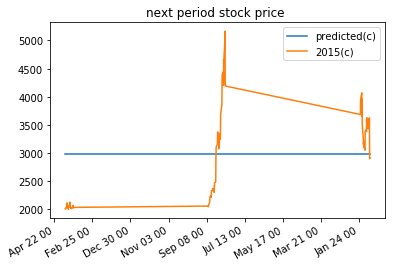

In [8]:
all_dates = data_stock.index.get_values()

fig, ax = plt.subplots(1)
fig.autofmt_xdate()

predicted_values = predicted.flatten() 
predicted_dates = all_dates[len(all_dates)-len(predicted_values):len(all_dates)]
predicted_series = pd.Series(predicted_values, index=predicted_dates)
plot_predicted,= ax.plot(predicted_series, label='predicted(c)')

test_values = y['test'].flatten()
test_dates = all_dates[len(all_dates)- len(test_values):len(all_dates)]
test_series = pd.Series(test_values, index=test_dates)
plot_test, = ax.plot(test_series, label='2015(c)')

xfmt = mdates.DateFormatter('%b %d %H')
ax.xaxis.set_major_formatter(xfmt)

plt.title('next period stock price ')
plt.legend(handles=[plot_predicted, plot_test])
plt.show()